In [44]:
import numpy
import math
from matplotlib import pyplot
%matplotlib inline
from matplotlib import rcParams
rcParams['font.size']=16

In [45]:
def grid(N,x_start,x_end,y_start,y_end):
    x = numpy.linspace(x_start,x_end,N)
    y = numpy.linspace(y_start,y_end,N)
    X,Y = numpy.meshgrid(x,y)
    return X,Y,x,y

In [46]:
N = 200
x_start,x_end= -4.0,4.0
y_start,y_end=-2.0,2
X,Y,x,y = grid(N,-4.0,4.0,-2.0,2.0)


In [47]:
numpy.shape(Y)

(200, 200)

In [48]:
u_inf = 1.0
u_freestream = u_inf*numpy.ones((N,N), dtype=float)
v_freestream = numpy.zeros_like(u_freestream)
psi_freestream = u_inf*Y

In [49]:
def get_velocity(strength,xs,ys,X,Y):
    u = strength/(2*numpy.pi)*(X-xs)/((X-xs)**2+(Y-ys)**2)
    v = strength/(2*numpy.pi)*(Y-ys)/((X-xs)**2+(Y-ys)**2)
    return u,v

In [50]:
help(get_velocity)

Help on function get_velocity in module __main__:

get_velocity(strength, xs, ys, X, Y)



In [51]:
def get_stream_function(strength,xs,ys,X,Y):
    psi = strength/(2*numpy.pi)*numpy.arctan2((Y-ys),(X-xs))
    return psi

In [52]:
strength_source = 5.0
x_source,y_source = -1.0,0.0
u_source,v_source = get_velocity(strength_source,x_source,y_source,X,Y)
psi_source = get_stream_function(strength_source,x_source,y_source,X,Y)

In [53]:
u = u_freestream + u_source
v = v_freestream+v_source
psi = psi_freestream+psi_source

In [54]:
x_stagnation = x_source-strength_source/(2*numpy.pi*u_inf)
y_stagnation = y_source

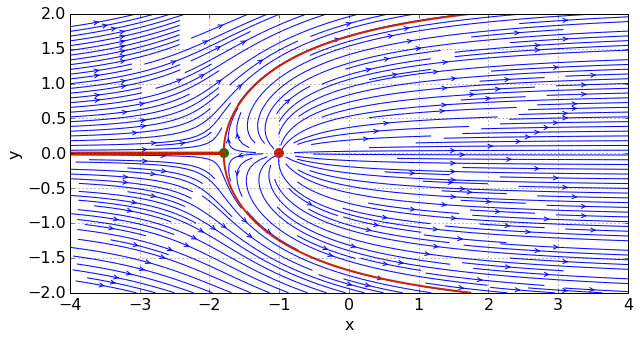

In [55]:
size=10
pyplot.figure(figsize=(size,(y_end-y_start)/(x_end-x_start)*size))
pyplot.grid(True)
pyplot.xlabel('x')
pyplot.ylabel('y')
pyplot.xlim(x_start,x_end)
pyplot.ylim(y_start,y_end)
pyplot.streamplot(X,Y,u,v,density=2,linewidth=1,arrowsize=1,arrowstyle='->')
pyplot.scatter(x_source,y_source,color='#CD2305',s=80,marker='o')

pyplot.scatter(x_stagnation,y_stagnation,color='g',s=80,marker='o')
pyplot.contour(X,Y,psi,levels=[-strength_source/2, +strength_source/2],colors='#CD2305',linewidths=2,linestyles='solid');

# challenge q1-do this
what is max width of rankine half body
hint: use mass conservation and think about flow when x is very large

In [65]:
strength_sink=-5.0
x_sink,y_sink=1.0,0.0
u_sink,v_sink=get_velocity(strength_sink,x_sink,y_sink,X,Y)
psi_sink=get_stream_function(strength_sink,x_sink,y_sink,X,Y)

In [66]:
u=u_freestream+u_source+u_sink
v = v_freestream+v_source+v_sink
psi = psi_freestream+psi_source+psi_sink


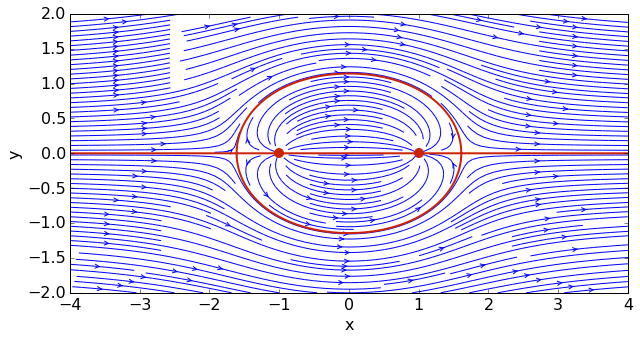

In [67]:
size=10
pyplot.figure(figsize=(size,(y_end-y_start)/(x_end-x_start)*size))
pyplot.xlabel('x')
pyplot.ylabel('y')
pyplot.xlim(x_start,x_end)
pyplot.ylim(y_start,y_end)
pyplot.streamplot(X,Y,u,v, density=2, linewidth=1,arrowsize=1,arrowstyle='->')
pyplot.scatter([x_source,x_sink],[y_source,y_sink], color='#CD2305',s=80,marker='o')
pyplot.contour(X,Y,psi,levels=[0.],colors='#CD2305',linewidths=2,linestyles='solid');


# Challenge Q2- do it
length and width of rankine oval

In [68]:
cp = 1.0-(u**2+v**2)/u_inf**2

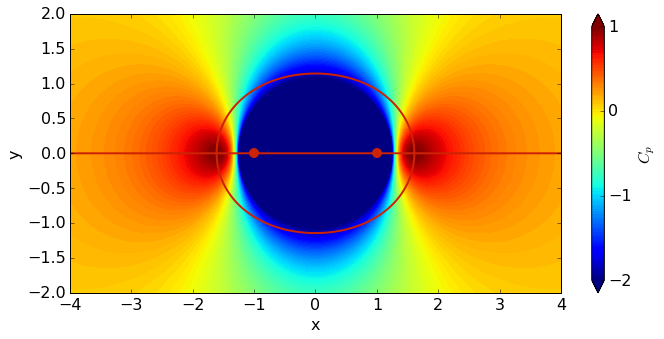

In [71]:
pyplot.figure(figsize = (1.1*size,(y_end-y_start)/(x_end-x_start)*size))
pyplot.xlabel('x')
pyplot.ylabel('y')
pyplot.xlim(x_start,x_end)
pyplot.ylim(y_start,y_end)
contf=pyplot.contourf(X,Y,cp,levels=numpy.linspace(-2.0,1.0,100), extend='both')
cbar = pyplot.colorbar(contf)
cbar.set_label('$C_p$')
cbar.set_ticks([-2.0,-1.0,0.0,1.0])
pyplot.scatter([x_source,x_sink],[y_source,y_sink],color='#CD2305',s=80,marker='o')
pyplot.contour(X,Y,psi,levels=[0.],colors='#CD2305',linewidths=2,linestyles='solid');